# Udacity WeRateDogs Data Wrangling Project

## Table of Contents

1. [Introduction](#intro)
2. [Data Wrangling](#wrangling)
    1. [Gather](#gather)
        1. [WeRateDogs Twitter Archive](#twitter-archive)
        2. [Image Predictions](#img-predictions)
        3. [Additional Data about Each Tweet](#additional-data)
    2. [Assess](#assess)
        1. [WeRateDogs Twitter Archive](#assess-archive)
        2. [Image Predictions](#assess-predictions)
        3. [Additional data](#assess-adt-data)
        4. [Quality Issues Observed](#quality-issues-obs)
        5. [Tidiness Issues Observed](#tidiness-issues-obs)
    3. [Clean](#clean)
        1. [Define](#define)
            1. [Quality Issues](#quality-issues-def)
            1. [Tidiness Issues](#tidiness-issues-def)
        2. [Code and Test](#code-test)
            1. [Tweets DataFrame](#tweets-df)
            2. [Dogs DataFrame](#dogs-df)
        3. [Storing Cleaned Data](#storing)
3. [Exploratory Data Analysis](#eda)
    1. [How are the ratings distributed?](#ratings-dist)
    2. [Is there a correlation between dog ratings and number of favorites?](#ratings-fav-corr)
    3. [Did the page increase its average number of likes considerably?](#favs-over-time)
    4. [Did the page maintain consistency in its ratings over time?](#ratings-consistency)
    5. [Is there a correlation between tweet published hour and number of favorites?](#hour-fav-corr)
    6. [Do any dog stage receive more favorites than the others?](#fav-stage-corr)
    7. [Which dog breeds receive the most favorites?](#top10)
    8. [Are non-standard ratings going better than standard ones?](#non-standard)
4. [References](#references)

## Introduction <a name="intro"></a>
This project was developed to prove the understanding of the topics covered in the **Data Wrangling** module of [Udacity Data Analyst Nanodegree](https://www.udacity.com/course/data-analyst-nanodegree--nd002).  
The main goal of the project is to use the data provided by [Twitter](https://twitter.com/) on the [WeRateDogs](https://twitter.com/dog_rates) page to create analyses and visualizations. However, as real-world data rarely comes clean, it is necessary that the student handle the possible issues in the obtained data in order to accomplish trustworthy conclusions.

In [1]:
# Necessary imports
import requests
import os
import json
import time
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib import cm
from random import randint

## Data Wrangling <a name="wrangling"></a>

In this section of the report I will gather the necessary data, understand its general properties, identify and clean possible quality and tidiness errors such as missing or incorrect values.

### Gather <a name="gather"></a>

Here I will be gathering each of the three pieces of data for this project.  
  
1. **WeRateDogs Twitter archive:** this file is provided by Udacity in a `.csv` file called `twitter_archive_enhanced.csv`.
2. **Image predictions:** has information about the breed of dog or object shown in the tweet photo. It is stored on Udacity's servers in the file `image_predictions.tsv`.
3. **Additional data about each tweet**: information such as the number of likes or retweets of each tweet. It can be accessed using the Twitter API with tweepy.

#### WeRateDogs Twitter Archive <a name="twitter-archive"></a>

In [2]:
# Converting csv file to Pandas DataFrame
twitter_archive_df = pd.read_csv('data/twitter-archive-enhanced.csv')
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Image Predictions <a name="img-predictions"></a>

In [3]:
# Getting the file from the Udacity server and saving it in the data folder
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join('data', url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [4]:
# Converting csv file to Pandas DataFrame
image_predictions_df = pd.read_csv('data/image-predictions.tsv', sep='\t')
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Additional Data about Each Tweet <a name="additional-data"></a>

In [5]:
# Keys and tokens provided by Twitter
consumer_key = 'YOUR CONSUMER KEY HERE'
consumer_secret = 'YOUR CONSUMER SECRET HERE'
access_token = 'YOUR ACCESS TOKEN HERE'
access_secret = 'YOUR ACCESS SECRET HERE'

# Creating Twitter API object with rate limits parameters
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
# Creating empty list to store tweet data (json format)
tweet_json_list = []
# Creating empty dict to store the tweets that can't be accessed
errors_dict = {}
# Defining the start time to check how long it took to access the data
start_time = time.time()

for tweet_id in twitter_archive_df.tweet_id.values:
    try:
        # Adding tweet info to tweet_json_list
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        tweet_json_list.append(tweet._json)
    except tweepy.TweepError as error:
        # Adding tweets that could't be accessed in the errors_dict
        errors_dict[tweet_id] = error
            
# Checking how much time the was spent
elapsed_time = time.time() - start_time

# Printing elapsed time in HH:MM:SS format
hms_elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print('\n Time elapsed (HH:MM:SS): ' + hms_elapsed_time)
print('-'*55)

# Printing each tweet_id and error in the errors_dict
for tweet_id in errors_dict:
    print('ID:', tweet_id, 'ERROR:', errors_dict[tweet_id])
print('-'*55)

# Checking number of errors
print('\n Number of errors: ' + str(len(errors_dict)))

Rate limit reached. Sleeping for: 89
Rate limit reached. Sleeping for: 197



 Time elapsed (HH:MM:SS): 00:38:35
-------------------------------------------------------
ID: 888202515573088257 ERROR: [{'code': 144, 'message': 'No status found with that ID.'}]
ID: 873697596434513921 ERROR: [{'code': 144, 'message': 'No status found with that ID.'}]
ID: 872668790621863937 ERROR: [{'code': 144, 'message': 'No status found with that ID.'}]
ID: 872261713294495745 ERROR: [{'code': 144, 'message': 'No status found with that ID.'}]
ID: 869988702071779329 ERROR: [{'code': 144, 'message': 'No status found with that ID.'}]
ID: 866816280283807744 ERROR: [{'code': 144, 'message': 'No status found with that ID.'}]
ID: 861769973181624320 ERROR: [{'code': 144, 'message': 'No status found with that ID.'}]
ID: 856602993587888130 ERROR: [{'code': 144, 'message': 'No status found with that ID.'}]
ID: 851953902622658560 ERROR: [{'code': 144, 'message': 'No status found with that ID.'}]
ID: 845459076796616705 ERROR: [{'code': 144, 'message': 'No status found with that ID.'}]
ID: 8447

In [7]:
# Writting tweet data to a .txt file
with open('data/tweet-json.txt', 'w') as outfile:
    for tweet_json in tweet_json_list:
        json.dump(tweet_json, outfile)
        outfile.write('\n')

In [8]:
# Creating empty list that will be used to hold fav and rt count for each tweet
tweet_extra_data_list = []

# Reading .txt file 
with open('data/tweet-json.txt', 'r') as json_file:
    # Reading first line
    line = json_file.readline()
    
    # While there's a next line execute following code
    while line:
        # Select tweet id, fav and rt count
        tweet = json.loads(line)
        tweet_id = tweet['id']
        tweet_retweet_count = tweet['retweet_count']
        tweet_favorite_count = tweet['favorite_count']
        
        # Save selected data to a dict
        tweet_data = {'tweet_id': tweet_id, 
                      'retweet_count': tweet_retweet_count, 
                      'favorite_count': tweet_favorite_count,
                     }
        
        # Add tweet_data to tweet_json_data
        tweet_extra_data_list.append(tweet_data)

        # Read next line
        line = json_file.readline()

tweet_extra_data_list[0]

{'tweet_id': 892420643555336193,
 'retweet_count': 7721,
 'favorite_count': 36250}

In [9]:
# Creating Pandas DataFrame with tweet_json_data
tweet_extra_data_df = pd.DataFrame(tweet_extra_data_list, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

tweet_extra_data_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7721,36250
1,892177421306343426,5707,31263
2,891815181378084864,3782,23543
3,891689557279858688,7877,39547
4,891327558926688256,8493,37766


### Assess  <a name="assess"></a>
The main objective of the Assess section is to better understand each piece of data and identify possible issues that must be cleaned.  
All identified issues will be listed after the assessment of the data and divided between quality and tidiness problems for each piece of data, in order to facilitate the reading of the report.

#### WeRateDogs Twitter Archive  <a name="assess-archive"></a>

In [10]:
# Visualizing 5 random rows
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
305,836260088725786625,NaN,NaN,2017-02-27 17:01:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She spent all morning overseeing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836260088...,13,10,Lucy,None,None,None,None
2032,671763349865160704,NaN,NaN,2015-12-01 18:50:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mark. He's a good dog. Always rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671763349...,9,10,Mark,None,None,None,None
552,804413760345620481,NaN,NaN,2016-12-01 19:56:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rusty. He's going D1 fo...,7.848260e+17,4.196984e+09,2016-10-08 18:41:19 +0000,https://twitter.com/dog_rates/status/784826020...,13,10,Rusty,None,None,None,None
282,839239871831150596,NaN,NaN,2017-03-07 22:22:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Odie. He's big. 13/10 would attempt to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/839239871...,13,10,Odie,None,None,None,None
871,761599872357261312,NaN,NaN,2016-08-05 16:28:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Sephie. According to this picture, she...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/761599872...,11,10,Sephie,None,None,None,None


In [11]:
# Checking df number of rows and columns
twitter_archive_df.shape

(2356, 17)

In [12]:
# Checking df datatypes
twitter_archive_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [13]:
# Checking missing values
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
# I found it strange that there were None values in some columns and wanted to understand why
twitter_archive_df.query('name == "None"').head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None


In [15]:
# Checking name column values to see if there's any inconsistency
twitter_archive_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [16]:
# Checking tweet with a invalid dog name to better understand this possible problem
twitter_archive_df[twitter_archive_df.name == 'a'].expanded_urls.iloc[0]

'https://twitter.com/dog_rates/status/881536004380872706/video/1'

In [17]:
# Looking at the unique sources
twitter_archive_df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [18]:
# Trying to understand what was this 'Vine - Make a Scene' value
twitter_archive_df[twitter_archive_df.source == 
                   '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'].head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
529,808344865868283904,NaN,NaN,2016-12-12 16:16:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Seamus. He's very bad at entering pool...,NaN,NaN,NaN,https://vine.co/v/5QWd3LZqXxd,11,10,Seamus,None,None,None,None


In [19]:
# Selecting replies that have urls so I can look at the tweet
twitter_archive_df[twitter_archive_df.in_reply_to_status_id.notnull() &
                   twitter_archive_df.expanded_urls.notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
251,844979544864018432,7.590995e+17,4.196984e+09,2017-03-23 18:29:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I'm proud to announce that Toby is 23...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844979544...,13,10,None,None,None,None,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [20]:
# Selecting a tweet to look
twitter_archive_df.iloc[251].expanded_urls.split(',')

['https://twitter.com/dog_rates/status/844979544864018432/photo/1',
 'https://twitter.com/dog_rates/status/844979544864018432/photo/1',
 'https://twitter.com/dog_rates/status/844979544864018432/photo/1']

In [21]:
# Checking for tweets that doesn't have urls linked
twitter_archive_df[twitter_archive_df.in_reply_to_status_id.isnull() &
                   twitter_archive_df.retweeted_status_user_id.isnull() &
                   twitter_archive_df.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


In [22]:
# Checking doggo unique values to understand the dog stages columns
twitter_archive_df.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [23]:
# Checking descriptive statistics
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
# Checking tweets that have a rating_numerator of 0, because it is strange for a dog page
twitter_archive_df.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [25]:
# Checking tweets that have a rating_numerator of 1776, because it is definitely a notable value
twitter_archive_df.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [26]:
# Checking tweets that have a rating_denominator of 0, because it doesn't follow the page's rating pattern
twitter_archive_df.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


#### Image Predictions  <a name="assess-predictions"></a>

In [27]:
# Visualizing 5 random rows
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
651,682003177596559360,https://pbs.twimg.com/media/CXb2RcDUsAEnkJb.jpg,1,triceratops,0.249872,False,chimpanzee,0.060929,False,mask,0.050221,False
75,667405339315146752,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True
1603,800141422401830912,https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,Labrador_retriever,0.022977,True
653,682047327939461121,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,1,teddy,0.364095,False,doormat,0.119243,False,toyshop,0.035127,False
1157,733482008106668032,https://pbs.twimg.com/media/Ci3Z_idUkAA8RUh.jpg,1,French_bulldog,0.619382,True,computer_keyboard,0.142274,False,mouse,0.058505,False


In [28]:
# Checking image_predictions shape
image_predictions_df.shape

(2075, 12)

In [29]:
# Checking columns data types
image_predictions_df.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [30]:
# Looking for missing values
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [31]:
# Checking some photos to better understand the predictions
print(image_predictions_df.iloc[1037].jpg_url)
print(image_predictions_df.iloc[442].jpg_url)
print(image_predictions_df.iloc[293].jpg_url)
print(image_predictions_df.iloc[1480].jpg_url)

https://pbs.twimg.com/tweet_video_thumb/CeGGkWuUUAAYWU1.jpg
https://pbs.twimg.com/media/CVzG3yOVAAAqi9I.jpg
https://pbs.twimg.com/media/CVEbFDRWsAAkN_7.jpg
https://pbs.twimg.com/media/CtYqeNHWgAATqYZ.jpg


In [32]:
# Looking for inconsistencies in p1 values
image_predictions_df.p1.unique()[:30]

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier'], dtype=object)

In [33]:
# Looking for inconsistencies in p2 values
image_predictions_df.p2.unique()[:30]

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow'], dtype=object)

#### Additional data  <a name="assess-adt-data"></a>

In [34]:
# Visualizing 5 random rows
tweet_extra_data_df.sample(5)

,tweet_id,retweet_count,favorite_count
1085,733828123016450049,779,3567
1447,693993230313091072,400,1874
752,776813020089548800,1231,4947
1547,687704180304273409,841,2420
969,748575535303884801,1977,6096


In [35]:
# Checking tweet_extra_data_df shape
tweet_extra_data_df.shape

(2331, 3)

In [36]:
# Checking columns data types
tweet_extra_data_df.dtypes

tweet_id          int64
retweet_count     int64
favorite_count    int64
dtype: object

In [37]:
# Looking for missing values 
tweet_extra_data_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [38]:
# Creating a variable for 10 random rows with 0 favorites
zero_favs_sample = tweet_extra_data_df.query('favorite_count == 0').head(10)
zero_favs_sample

,tweet_id,retweet_count,favorite_count
31,886054160059072513,100,0
35,885311592912609280,16923,0
67,879130579576475649,6228,0
72,878404777348136964,1179,0
73,878316110768087041,6105,0
77,877611172832227328,73,0
90,874434818259525634,13369,0
95,873337748698140672,1473,0
105,871166179821445120,5289,0
119,868639477480148993,1940,0


In [39]:
# Checking url for the tweets that supposedly have zero favorites to verify if that's right
zero_favs_sample_ids = zero_favs_sample.tweet_id.values
for tweet_id in zero_favs_sample_ids:
    print(twitter_archive_df[twitter_archive_df['tweet_id'] == tweet_id].expanded_urls.values)

['https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873']
['https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1']
['https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1']
['https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1']
['https://twitter.com/dog_rates/status/669000397445533696/photo/1']
['https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1']
['https://twitter.com/dog_rates/status/866334964761202691/p

In [40]:
# Checking how many tweets supposedly have zero likes
len(tweet_extra_data_df.query('favorite_count == 0'))

163

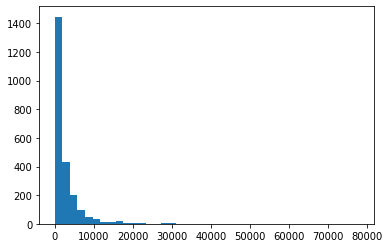

In [41]:
# Checking retweet_count distribution
plt.hist(tweet_extra_data_df.retweet_count, bins=40);

In [42]:
# Checking retweet_count interquartile range
tweet_extra_data_df.retweet_count.quantile([0.25, 0.75])

0.25     548.0
0.75    3146.5
Name: retweet_count, dtype: float64

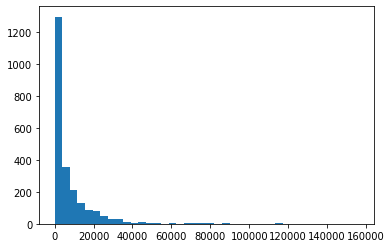

In [43]:
# Checking favorite_count distribution
plt.hist(tweet_extra_data_df.favorite_count, bins=40);

In [44]:
# Checking favorite_count third quartile
tweet_extra_data_df.favorite_count.quantile(0.75)

9269.0

In [45]:
"""
Checking fifteenth percentile of (favorite_count / retweet_count). 
It's important to notice that there's 161 tweets with 0 favorites, 
which represents approximately 7% of the tweets.
"""
(tweet_extra_data_df.favorite_count / tweet_extra_data_df.retweet_count).quantile(0.15)

2.0920114271415464

#### Quality Issues Observed  <a name="quality-issues-obs"></a>
`WeRateDogs Twitter Archive`:
1. IDs columns are floats not integers.
2. Timestamp is a string not a datetime object.
3. Source should be cleaned to make it more readable.
4. Incorret URLs (leads to another tweet's page, nonexistent page, or has several URLs).
5. Name column has invalid values like 'a', 'one', 'in', for example.
6. Missing data (tweets that doesn't have urls linked).

`Image Predictions`:
1. Some strings are lowercase and some aren't in columns p1, p2, p3.
2. There are tweets that don't have image predictions associated.

`Tweets Extra Data`:
1. There are 25 tweets from the original archive that couldn't be accessed using tweepy (TweepError).
2. There are 163 tweets that have zero favorites in the favorite_count column.

#### Tidiness Issues Observed  <a name="tidiness-issues-obs"></a>
1. There should only be two tables, one with all the information regarding the tweets and the other with all the information regarding the dogs presented in each tweet.
2. All replies and retweets must be dropped from the WeRateDogs Archive, according to Udacity's instructions on the scope of the project:
> "You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets."
3. After dropping replies and retweets, there's no use of retweets and replies related columns in the tweets table.
4. `timestamp` column should be divided in two columns: `date` and `time` in the tweets table.
5. Dog stages (`doggo`, `floof`, `pupper`, `pupper`) should be organized in a single column in the dogs table.

### Clean <a name="clean"></a>
Here I will be defining and executing programmatic solutions for each identified issue in the Assess section, as well as testing whether the proposed solution solved the problem or not.

#### Define <a name="define"></a>
Defining how I will solve the observed issues.

##### Quality Issues  <a name="quality-issues-def"></a>

`WeRateDogs Twitter Archive`:
1. Use the pandas [astype()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method to convert column values to integers.
2. Use the pandas [to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) method to convert column values to datetime.
3. Select only the text between ">" and "<".
4. Replace the URL column values with **"https://<span></span>twitter.com/dog_rates/status/"** + **the row's tweet ID**.
5. Replace invalid dog names with "None". Although some tweets actually have the dog's name in their text, this will be a plausible solution since those tweets represent a very small portion of the data and the dog names will not be used in further analyzes in this project.
6. This will actually be solved when I deal with the wrong or multiple URLs problem.

`Image Predictions`:
1. Use the pandas [str.lower()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html) method to lowercase strings in each column.
2. This can be solved by [inner merging](https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/) the information in the `Twitter Archive` and the `Image Predictions`.

`Tweets Extra Data`:
1. Since I'll join the number of favorites and retweets in the tweets archive table, the tweets that could not be accessed will have NaN values in the **favorite_count** and **retweet_count** columns. The favorites count column will be filled with a random selection of an integer (**randint()** method) between **2 times the number of retweets in the tweet** and the **third quartile** (docs for quartiles [here](https://en.wikipedia.org/wiki/Quartile)), this will not only ensure that the [measures of central tendency](https://statisticsbyjim.com/basics/measures-central-tendency-mean-median-mode/) do not suffer large variations, but also that the number of favorites is not less than 2 times the number of retweets, which is highly unlikely. In the case that number of retweets times 2 is greater than the third quartile of the number of favorites, the assigned value will be 1.75 times the number of retweets, aiming to minimize oscillations in the measures of central tendency., while the retweets count column will be filled by randomly selecting an integer inside the [interquartile range](https://www.statisticshowto.com/probability-and-statistics/interquartile-range/) with the [random](https://docs.python.org/3/library/random.html) **randint()** method, also ensuring that the [measures of central tendency](https://statisticsbyjim.com/basics/measures-central-tendency-mean-median-mode/) do not suffer significant variations.
2. All of the zero `favorite_count` tweets are actually replies or retweets, so when I drop these replies and retweets I will be solving this issue as well.

##### TIdiness Issues <a name="tidiness-issues-def"></a>
1. Separate the data into two tables, one called `dogs_df` and the other called `tweets_df`.
2. Drop all rows that have values in the replies or retweets columns.
3. Drop replies and retweets columns.
4. Create `date` and `time` using pandas [dt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) acessor object.
5. Create `dog_stage` column using the information of the dog stages columns. When there's no assigned stage, `dog_stage` column value should be "not informed". Then, delete dog stages columns.

#### Code and Test <a name="code-test"></a>
Here I will be using code techniques to clean up the data as planned in the **Define** section.  
For readability reasons, I decided to separate this process into two main steps:  

1. Creating, cleaning and testing the `tweets_df` table 
2. Creating, cleaning and testing the `dogs_df` table  

However, to maintain the line of reasoning of the study, I will be highlighting which issue the code aims to solve.

That being said, I will create copies of the DataFrames to preserve the initial data and start cleaning with code.

In [46]:
# Creating DataFrames copies
twitter_copy_df = twitter_archive_df.copy()
image_copy_df = image_predictions_df.copy()
extra_data_copy_df = tweet_extra_data_df.copy()

twitter_copy_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


##### Tweets DataFrame <a name="tweets-df"></a>

`Tidiness #1`

In [47]:
# Merging twitter df with extra data df to create tweets_df
tweets_df = pd.merge(twitter_copy_df, extra_data_copy_df, left_on='tweet_id', right_on='tweet_id', how ='outer')

In [48]:
# Drop all dogs related columns
tweets_df.drop(['rating_numerator', 'rating_denominator', 'name', 
                'doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [49]:
# Testing if tweets_df just have tweets information
tweets_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,7721.0,36250.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,5707.0,31263.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,3782.0,23543.0


`Tidiness #2` / `*Extra Data - Quality #2`

In [50]:
# Dropping replies and retweets
tweets_df.drop(tweets_df[tweets_df.in_reply_to_status_id.notnull() | tweets_df.retweeted_status_id.notnull()].index, 
               inplace=True)

In [51]:
# Testing if there's just null values in the retweets and replies columns
tweets_df.notnull().sum()

tweet_id                      2097
in_reply_to_status_id            0
in_reply_to_user_id              0
timestamp                     2097
source                        2097
text                          2097
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                 2094
retweet_count                 2090
favorite_count                2090
dtype: int64

In [52]:
# Testing if there's 0 values in the favorite_count column
tweets_df.query('favorite_count == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,retweet_count,favorite_count


`Tidiness #3`

In [53]:
# Dropping replies and retweets columns
tweets_df.drop(['in_reply_to_status_id', 
                'in_reply_to_user_id', 
                'retweeted_status_id', 
                'retweeted_status_user_id', 
                'retweeted_status_timestamp'], 
               inplace=True, 
               axis=1)

In [54]:
# Testing if there's any replies or retweets columns
tweets_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'retweet_count', 'favorite_count'],
      dtype='object')

`Twitter Archive - Quality #1`

In [55]:
# Converting tweet_id to int
tweets_df['tweet_id'] = tweets_df.tweet_id.astype('int64')

In [56]:
# Testing if tweet_id values are ints
tweets_df.tweet_id.dtype

dtype('int64')

`Twitter Archive - Quality #2`

In [57]:
# Converting timestamp to datetime
tweets_df['timestamp'] = pd.to_datetime(tweets_df.timestamp)

In [58]:
# Testing if timestamp values are datetime
tweets_df.timestamp.dtype

datetime64[ns, UTC]

`Tidiness #4`

In [59]:
# Creating 'date' and 'time' columns
tweets_df['date'] = tweets_df.timestamp.dt.date
tweets_df['time'] = tweets_df.timestamp.dt.time

In [60]:
# Drop timestamp column
tweets_df.drop('timestamp', axis=1, inplace=True)

In [61]:
# Testing if date and time columns were created correctly and timestamp was dropped
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id          2097 non-null int64
source            2097 non-null object
text              2097 non-null object
expanded_urls     2094 non-null object
retweet_count     2090 non-null float64
favorite_count    2090 non-null float64
date              2097 non-null object
time              2097 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 147.4+ KB


`Twitter Archive - Quality #3`

In [62]:
# Making source column values more readable
tweets_df['source'] = tweets_df.source.apply(lambda col_value: col_value.split('>')[1][:-3])

In [63]:
# Testing if source values were correctly changed
tweets_df.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

`Twitter Archive - Quality #4 and #6`

In [64]:
# Setting expanded_urls column as planned in the Define section
tweets_df['expanded_urls'] = tweets_df.apply(lambda row: 'https://twitter.com/dog_rates/status/' + 
                                                         str(row['tweet_id']), 
                                             axis=1)

In [65]:
# Testing if there's any URLs different then expected
tweets_df[tweets_df.expanded_urls != tweets_df.apply(lambda row: 'https://twitter.com/dog_rates/status/' + 
                                                         str(row['tweet_id']), axis=1)]

,tweet_id,source,text,expanded_urls,retweet_count,favorite_count,date,time


`Extra Data - Quality #1`

In [66]:
# Fill null values in retweet_count column
tweets_df.retweet_count.fillna(randint(int(tweets_df.retweet_count.quantile(0.25)), 
                                       int(tweets_df.retweet_count.quantile(0.75))), inplace=True)

# Fill null values in favorite_count column
fav_count_third_quartile_int = int(tweets_df.favorite_count.quantile(0.75))
tweets_df.favorite_count.fillna(tweets_df.apply(lambda row: randint(row['retweet_count']*2, 
                                                                    fav_count_third_quartile_int) 
                                                if row['retweet_count']*2 <= fav_count_third_quartile_int 
                                                else row['retweet_count']*1.75, axis=1), inplace=True)

In [67]:
# Testing if there's any null values in the DataFrame
tweets_df.isnull().sum()

tweet_id          0
source            0
text              0
expanded_urls     0
retweet_count     0
favorite_count    0
date              0
time              0
dtype: int64


Converting retweet_count and favorite_count columns to integers since they changed to float when creating tweets_df

In [68]:
# Converting retweet_count and favorite_count to int
tweets_df['retweet_count'] = tweets_df.retweet_count.astype('int64')
tweets_df['favorite_count'] = tweets_df.favorite_count.astype('int64')

In [69]:
# Testing if it worked
tweets_df.dtypes

tweet_id           int64
source            object
text              object
expanded_urls     object
retweet_count      int64
favorite_count     int64
date              object
time              object
dtype: object

Changing the column name `tweet_id` to `id` since all comments are about tweets and `expanded_url` to `url` for simplicity

In [70]:
# Renaming columns to simple names
tweets_df.rename(columns={'tweet_id': 'id', 'expanded_urls': 'url'}, inplace=True)

`tweets_df` should be cleaned now

In [71]:
# Checking tweets_df
tweets_df.head()

,id,source,text,url,retweet_count,favorite_count,date,time
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,7721,36250,2017-08-01,16:23:56
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,5707,31263,2017-08-01,00:17:27
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,3782,23543,2017-07-31,00:18:03
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,7877,39547,2017-07-30,15:58:51
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,8493,37766,2017-07-29,16:00:24


##### Dogs DataFrame <a name="dogs-df"></a>

`Tidiness #1` / `Image Predictions - Quality #2`

In [72]:
# Dropping replies and retweets
twitter_copy_df.drop(twitter_copy_df[twitter_copy_df.in_reply_to_status_id.notnull() | 
                                     twitter_copy_df.retweeted_status_id.notnull()].index, inplace=True)

# Merging twitter df with extra data df to create tweets_df
dogs_df = pd.merge(twitter_copy_df[['tweet_id', 'rating_numerator', 'rating_denominator', 'name', 
                                    'doggo', 'floofer', 'pupper', 'puppo']], 
                   image_copy_df, 
                   left_on='tweet_id', right_on='tweet_id', how ='inner')

In [73]:
# Testing if dogs_df just have informations about the tweeted dogs
dogs_df.head(3)

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


`Twitter Archive - Quality #5`

In [74]:
# Setting every invalid name to "None" in the name column
dogs_df['name'] = dogs_df.name.apply(lambda col_value: 'None' if col_value[0].islower() else col_value)

In [75]:
# Testing if there's any invalid name
dogs_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

`Tidiness #5`

In [76]:
# Create dog_stage column to hold stage info
dogs_df['stage'] = 'not informed'
df_indexes, stage_indexes = np.where(dogs_df[['doggo', 
                                              'floofer', 
                                              'pupper', 
                                              'puppo']] != 'None')


dogs_df.loc[df_indexes, 'stage'] = np.array(['doggo', 'floofer', 'pupper', 'puppo'])[stage_indexes]

In [77]:
# Dropping dog stages columns
dogs_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [78]:
# Testing if the stage column was created and the dog stages columns were deleted
dogs_df.columns

Index(['tweet_id', 'rating_numerator', 'rating_denominator', 'name', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'stage'],
      dtype='object')

In [79]:
# Testing if the stage column values are like expected
dogs_df.stage.unique()

array(['not informed', 'doggo', 'puppo', 'pupper', 'floofer'],
      dtype=object)

`Image Predictions - Quality #1`

In [80]:
# Setting p1, p2 and p3 column values to lowercase strings
dogs_df['p1'] = dogs_df.p1.str.lower()
dogs_df['p2'] = dogs_df.p2.str.lower()
dogs_df['p3'] = dogs_df.p3.str.lower()

In [81]:
# Testing if all probabilities columns values are lowercase (if all is good it should return 1971, the df length)
len(dogs_df[dogs_df.p1.str.islower() & dogs_df.p2.str.islower() & dogs_df.p3.str.islower()])

1971

Creating `breed` and `breed_confidence` columns with the most probably dog breed of each picture (this is called [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering))

In [82]:
# Creating breed column with the most probably dog breed
dogs_df['breed'] = dogs_df.apply(lambda row: row['p1'] if row['p1_dog'] 
                                 else(row['p2'] if row['p2_dog'] 
                                      else(row['p3'] if row['p3_dog'] 
                                           else 'unable to recognize')), axis=1)

# Creating breed_confidence column with the confidence of the breed prevision
dogs_df['breed_confidence'] = dogs_df.apply(lambda row: row['p1_conf'] if row['p1_dog'] 
                                            else(row['p2_conf'] if row['p2_dog'] 
                                                 else(row['p3_conf'] if row['p3_dog'] 
                                                      else 0)), axis=1)

In [83]:
# Testing if breed and breed_confidence were created correctly
dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 18 columns):
tweet_id              1971 non-null int64
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
stage                 1971 non-null object
breed                 1971 non-null object
breed_confidence      1971 non-null float64
dtypes: bool(3), float64(4), int64(4), object(7)
memory usage: 332.1+ KB


Dropping prediction columns

In [84]:
# Dropping prediction columns
dogs_df.drop(['p1', 'p1_conf', 'p1_dog', 
              'p2', 'p2_conf', 'p2_dog', 
              'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

In [85]:
# Testing if the prediction columns were dropped
dogs_df.columns

Index(['tweet_id', 'rating_numerator', 'rating_denominator', 'name', 'jpg_url',
       'img_num', 'stage', 'breed', 'breed_confidence'],
      dtype='object')

Converting img_num to integer since it changed to float when creating dogs_df

In [86]:
# Converting img_num to int
dogs_df['img_num'] = dogs_df.img_num.astype('int64')

In [87]:
# Testing if it worked
dogs_df.img_num.dtype

dtype('int64')

`dogs_df` should be cleaned now

In [88]:
# Checking dogs_df
dogs_df.head()

,tweet_id,rating_numerator,rating_denominator,name,jpg_url,img_num,stage,breed,breed_confidence
0,892420643555336193,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,not informed,unable to recognize,0.000000
1,892177421306343426,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,not informed,chihuahua,0.323581
2,891815181378084864,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,not informed,chihuahua,0.716012
3,891689557279858688,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,not informed,labrador_retriever,0.168086
4,891327558926688256,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,not informed,basset,0.555712


#### Storing Cleaned Data  <a name="storing"></a>

As requested by Udacity, I will be storing the combined cleaned data in a **.csv** file called `twitter_archive_master.csv`.  
I also decided to store `tweets_df` and `dogs_df` as separate **.csv** files.

In [89]:
# Storing tweets_df and dogs_df as separate files
tweets_df.to_csv('data/tweets-clean.csv', index=False)
dogs_df.to_csv('data/dogs-clean.csv', index=False)

In [90]:
# Merging tweets_df df with dogs_df to create combined_clean_df
combined_clean_df = pd.merge(tweets_df, dogs_df, left_on='id', right_on='tweet_id', how ='inner')
combined_clean_df.head()

,id,source,text,url,retweet_count,favorite_count,date,time,tweet_id,rating_numerator,rating_denominator,name,jpg_url,img_num,stage,breed,breed_confidence
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,7721,36250,2017-08-01,16:23:56,892420643555336193,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,not informed,unable to recognize,0.000000
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,5707,31263,2017-08-01,00:17:27,892177421306343426,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,not informed,chihuahua,0.323581
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,3782,23543,2017-07-31,00:18:03,891815181378084864,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,not informed,chihuahua,0.716012
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,7877,39547,2017-07-30,15:58:51,891689557279858688,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,not informed,labrador_retriever,0.168086
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,8493,37766,2017-07-29,16:00:24,891327558926688256,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,not informed,basset,0.555712


In [91]:
# Dropping id column since it's repeated
combined_clean_df.drop('id', axis=1, inplace=True)

In [92]:
# Renaming stage and breed columns to be easier to understand
combined_clean_df.rename(columns={'stage': 'dog_stage', 'breed': 'dog_breed'}, inplace=True)

In [93]:
# Checking if any column changed its data type
combined_clean_df.dtypes

source                 object
text                   object
url                    object
retweet_count           int64
favorite_count          int64
date                   object
time                   object
tweet_id                int64
rating_numerator        int64
rating_denominator      int64
name                   object
jpg_url                object
img_num                 int64
dog_stage              object
dog_breed              object
breed_confidence      float64
dtype: object

In [94]:
# Storing combined_clean_df as twitter_archive_master.csv in the data folder
combined_clean_df.to_csv('data/twitter-archive_master.csv', index=False)

## Exploratory Data Analysis <a name="eda"></a>

In the Exploratory Data Analysis (EDA) section of the report, I will be computing statistics and creating visualizations in order to achieve meaningful findings, such as correlations or patterns in the provided data.

### How are the ratings distributed? <a name="ratings-dist"></a>

In [95]:
# Selecting all the ratings that follow the page standard with denominator equal to 10
normal_denominator_ratings = combined_clean_df.query('rating_denominator == 10')[['tweet_id', 'rating_numerator']]
# Selecting ratings that doesn't follow the page standard
unusual_denominator_ratings = combined_clean_df.query('rating_denominator != 10')[['tweet_id', 'rating_numerator', 
                                                                                   'rating_denominator']]

unusual_denominator_ratings

,tweet_id,rating_numerator,rating_denominator
320,820690176645140481,84,70
382,810984652412424192,24,7
658,758467244762497024,165,150
794,740373189193256964,9,11
842,731156023742988288,204,170
884,722974582966214656,4,20
918,716439118184652801,50,50
939,713900603437621249,99,90
963,710658690886586372,80,80
981,709198395643068416,45,50


In [96]:
# Normalizing rating numerator of unstandard values
unusual_denominator_ratings['rating_numerator'] = (unusual_denominator_ratings.rating_numerator / 
                                                   (unusual_denominator_ratings.rating_denominator/10)).astype('int64')

unusual_denominator_ratings

,tweet_id,rating_numerator,rating_denominator
320,820690176645140481,12,70
382,810984652412424192,34,7
658,758467244762497024,11,150
794,740373189193256964,8,11
842,731156023742988288,12,170
884,722974582966214656,2,20
918,716439118184652801,10,50
939,713900603437621249,11,90
963,710658690886586372,10,80
981,709198395643068416,9,50


In [97]:
# Dropping rating denominator column
unusual_denominator_ratings.drop('rating_denominator', inplace=True, axis=1)

unusual_denominator_ratings

,tweet_id,rating_numerator
320,820690176645140481,12
382,810984652412424192,34
658,758467244762497024,11
794,740373189193256964,8
842,731156023742988288,12
884,722974582966214656,2
918,716439118184652801,10
939,713900603437621249,11
963,710658690886586372,10
981,709198395643068416,9


In [98]:
# Concatenating normal_denominator_ratings and unusual_denominator_ratings to create a normalized dataframe
normalized_ratings = pd.concat([normal_denominator_ratings, unusual_denominator_ratings])
normalized_ratings.head()

,tweet_id,rating_numerator
0,892420643555336193,13
1,892177421306343426,13
2,891815181378084864,12
3,891689557279858688,13
4,891327558926688256,12


In [99]:
# Checking normalized_ratings descriptive statistics
normalized_ratings.describe()

,tweet_id,rating_numerator
count,1.971000e+03,1971.000000
mean,7.360418e+17,11.694571
std,6.752810e+16,40.906295
min,6.660209e+17,0.000000
25%,6.758656e+17,10.000000
50%,7.088343e+17,11.000000
75%,7.880951e+17,12.000000
max,8.924206e+17,1776.000000


In [100]:
# It seems that there are some outliers, so I'm going to check every tweet with a rating numerator greater than 20
normalized_ratings.query('rating_numerator >= 20')

,tweet_id,rating_numerator
499,786709082849828864,75
549,778027034220126208,27
722,749981277374128128,1776
1359,680494726643068929,26
1696,670842764863651840,420
382,810984652412424192,34


In [101]:
# Dropping outliers
normalized_ratings.drop(normalized_ratings.query('rating_numerator >= 20').index, inplace=True)

In [102]:
# Checking if the outliers were dropped
normalized_ratings.describe()

,tweet_id,rating_numerator
count,1.965000e+03,1965.000000
mean,7.360109e+17,10.530280
std,6.756534e+16,2.182537
min,6.660209e+17,0.000000
25%,6.758531e+17,10.000000
50%,7.088109e+17,11.000000
75%,7.881506e+17,12.000000
max,8.924206e+17,14.000000


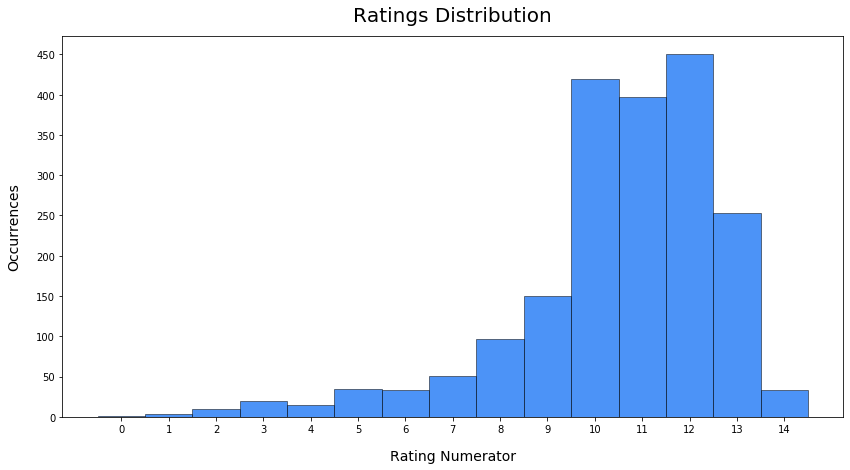

In [103]:
# Setting figure size
plt.figure(figsize=(14, 7))

# Plotting histogram
plt.hist(normalized_ratings.rating_numerator, bins=np.arange(16) - 0.5, alpha=0.7, 
         edgecolor='black', linewidth=0.7,  color=['#0066F5'])

# Setting title and axis labels
plt.title('Ratings Distribution', size=20, pad=15)
plt.xlabel('Rating Numerator', size=14, labelpad=15)
plt.ylabel('Occurrences', size=14, labelpad=15)

# Setting axis ticks
plt.xticks(range(0, 15))
plt.yticks(range(0, 470, 50))

#Saving figure
plt.savefig('visualizations/ratings_distribution.png');

It appears that it is a left-skewed distribution, with the highest number of ratings range being between 10 and 13.  
The most frequent value is 12.

### Is there a correlation between dog ratings and number of favorites? <a name="ratings-fav-corr"></a>

In [104]:
# Creating df with rating numerator and number of favorites
ratings_favorites = pd.merge(normalized_ratings[['tweet_id', 'rating_numerator']], 
                             combined_clean_df[['tweet_id', 'favorite_count']], 
                             left_on='tweet_id', 
                             right_on='tweet_id', 
                             how='inner')
ratings_favorites.head()

,tweet_id,rating_numerator,favorite_count
0,892420643555336193,13,36250
1,892177421306343426,13,31263
2,891815181378084864,12,23543
3,891689557279858688,13,39547
4,891327558926688256,12,37766


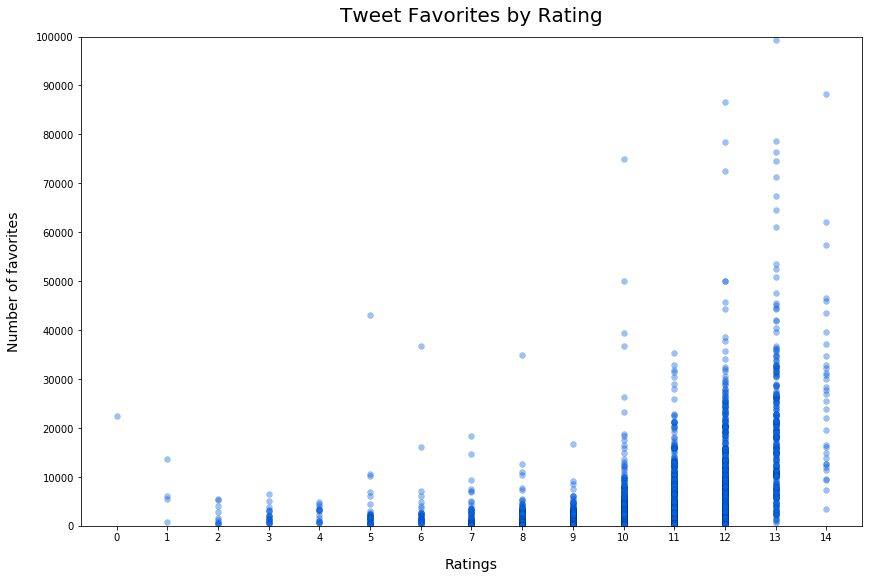

In [105]:
# Setting figure size
plt.figure(figsize=(14, 9))

# Creating scatter plot
plt.scatter(ratings_favorites['rating_numerator'], ratings_favorites['favorite_count'], alpha = 0.4, 
            edgecolor='black', linewidth=0.2,  color=['#0066F5'])

# Setting title and axis labels
plt.title('Tweet Favorites by Rating', size=20, pad=15)
plt.xlabel('Ratings', size=14, labelpad=15)
plt.ylabel('Number of favorites', size=14, labelpad=15);

# Defining the interest limit for the number of favorites, since there's plenty outliers
plt.ylim(0, 100000)

# Setting axis ticks
plt.xticks(range(0, 15))
plt.yticks(range(0, 100001, 10000));

#Saving figure
plt.savefig('visualizations/fav_rating_corr.png');

It seems that there is a positive correlation, however, this may only occur due to the fact that higher ratings are more frequent than lower ratings and the average number of likes per tweet of the page had grew over the past years/months. If this is true and the page has maintained the consistency of its ratings (or at least has not started to give low ratings after a certain date), the correlation may not exist.

### Did the page increase its average number of likes considerably? <a name="favs-over-time"></a>

In [106]:
# Creating df with number of favorites and date info
favorites_date = combined_clean_df[['tweet_id', 'favorite_count', 'date']].copy()
favorites_date.head()

,tweet_id,favorite_count,date
0,892420643555336193,36250,2017-08-01
1,892177421306343426,31263,2017-08-01
2,891815181378084864,23543,2017-07-31
3,891689557279858688,39547,2017-07-30
4,891327558926688256,37766,2017-07-29


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


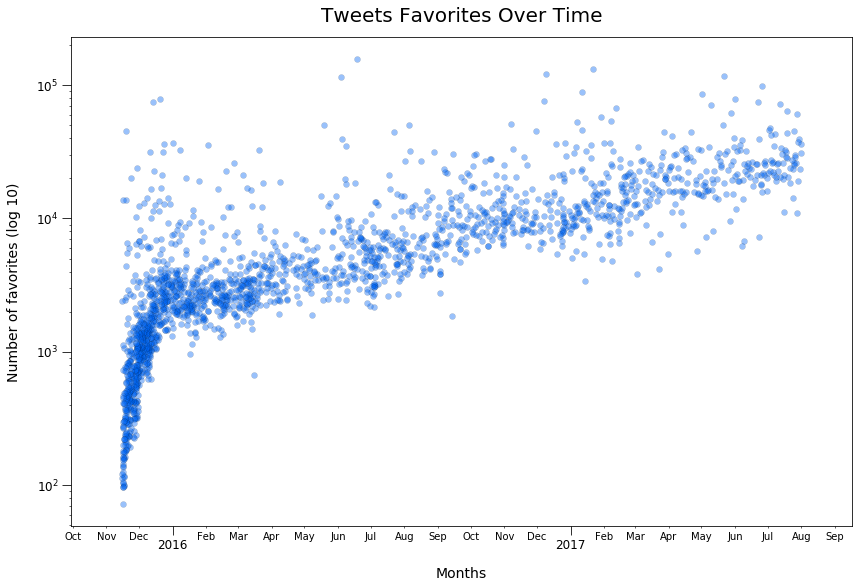

In [107]:
# Create a figure and define its size
fig, ax = plt.subplots(figsize=(14, 9))
# Display a scatter plot (date x number of favorites)
plt.scatter(favorites_date['date'], favorites_date['favorite_count'], alpha = 0.4, 
            edgecolor='black', linewidth=0.2,  color=['#0066F5'])
# Set y axis scale to logarithmic (since there's some tweets with a huge number of favorites)
plt.yscale('log')
# Set title and axis labels
plt.title('Tweets Favorites Over Time', size=20, pad=15)
plt.xlabel('Months', size=14, labelpad=15)
plt.ylabel('Number of favorites (log 10)', size=14, labelpad=15);

# Date tickers that locate years and months
years = mdates.YearLocator()
months = mdates.MonthLocator()
# Format year ticks to be the year number (YYYY)
years_fmt = mdates.DateFormatter('%Y')
# Format month ticks to be an abbreviation of the month name (Oct, Dec, etc.)
months_fmt = mdates.DateFormatter('%b')

# Set major x ticks to be the years numbers
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
# Set minor x ticks to be the months abbreviations
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(months_fmt)

# Set major ticks to be longer and have a bigger label size
ax.tick_params(which='major', length=9, labelsize=12)

#Saving figure
plt.savefig('visualizations/favorites_over_time.png');

It is clear that the page grew extremely fast in its first two months and reached a notable average number of favorites in early 2016, having, in its tweet with fewer favorites, more than 1000 "little hearts".  
This growth did not stop after the beginning of 2016 and, although the initial page growth is visually appealing on a logarithmic scale, the average number of favorites has risen to the tens of thousands of units during 2016 and beyond.

### Did the page maintain consistency in its ratings over time? <a name="ratings-consistency"></a>

In [108]:
# Creating df with number of favorites, date and rating of the tweets
favorites_date_ratings = pd.merge(favorites_date, normalized_ratings, left_on='tweet_id', 
                                  right_on='tweet_id', how='inner')

favorites_date_ratings.head()

,tweet_id,favorite_count,date,rating_numerator
0,892420643555336193,36250,2017-08-01,13
1,892177421306343426,31263,2017-08-01,13
2,891815181378084864,23543,2017-07-31,12
3,891689557279858688,39547,2017-07-30,13
4,891327558926688256,37766,2017-07-29,12


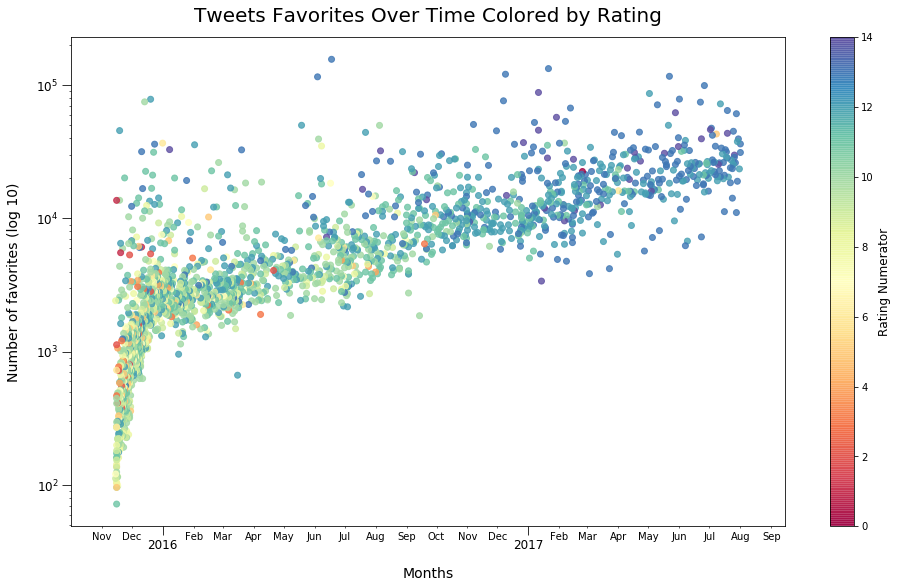

In [109]:
# Create a figure and define its size
fig, ax = plt.subplots(figsize=(16, 9))

# Defining diverging color map for the scatter plot
color_map = cm.get_cmap('Spectral')

# Displaying scatter plot colored by rating_numerator
plt.scatter(favorites_date_ratings['date'], favorites_date_ratings['favorite_count'], alpha = 0.8, 
            c=favorites_date_ratings['rating_numerator'], cmap=color_map)

# Set y axis scale to logarithmic, since a linear scale doesn't provide a good visualization due to many outliers
plt.yscale('log')

# Creating colorbar and setting its label
cbar = plt.colorbar()
cbar.set_label('Rating Numerator', size=12)

# Setting title and axis labels
plt.title('Tweets Favorites Over Time Colored by Rating', size=20, pad=15)
plt.xlabel('Months', size=14, labelpad=15)
plt.ylabel('Number of favorites (log 10)', size=14, labelpad=15);

# Date tickers that locate years and months
years = mdates.YearLocator()
months = mdates.MonthLocator()
# Format year ticks to be the year number (YYYY)
years_fmt = mdates.DateFormatter('%Y')
# Format month ticks to be an abbreviation of the month name (Oct, Dec, etc.)
months_fmt = mdates.DateFormatter('%b')

# Set major x ticks to be the years numbers
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
# Set minor x ticks to be the months abbreviations
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(months_fmt)

# Set major ticks to be longer and have a bigger label size
ax.tick_params(which='major', length=9, labelsize=12)

#Saving figure
plt.savefig('visualizations/favs_over_time_rating.png');

It is possible to conclude that the WeRateDogs page was not totally consistent, gradually increasing the ratings numerator average, still, this did not hinder the growth of the page at any time.  
It is also possible to notice that low ratings are very rare, which, in the case of a page of dogs, is totally expected, since assigning low ratings can be seen as cruelty to the dog.

### Is there a correlation between tweet published hour and number of favorites? <a name="hour-fav-corr"></a>

In [110]:
# Creating df with time and number of favorites info
favorites_time = combined_clean_df[['tweet_id', 'favorite_count', 'time']].copy()

favorites_time.head()

,tweet_id,favorite_count,time
0,892420643555336193,36250,16:23:56
1,892177421306343426,31263,00:17:27
2,891815181378084864,23543,00:18:03
3,891689557279858688,39547,15:58:51
4,891327558926688256,37766,16:00:24


In [111]:
# Creating hour column by extracting the hour from the time column
favorites_time.loc[:, 'hour'] = favorites_time.time.apply(lambda col_value: col_value.hour)

favorites_time.head()

,tweet_id,favorite_count,time,hour
0,892420643555336193,36250,16:23:56,16
1,892177421306343426,31263,00:17:27,0
2,891815181378084864,23543,00:18:03,0
3,891689557279858688,39547,15:58:51,15
4,891327558926688256,37766,16:00:24,16


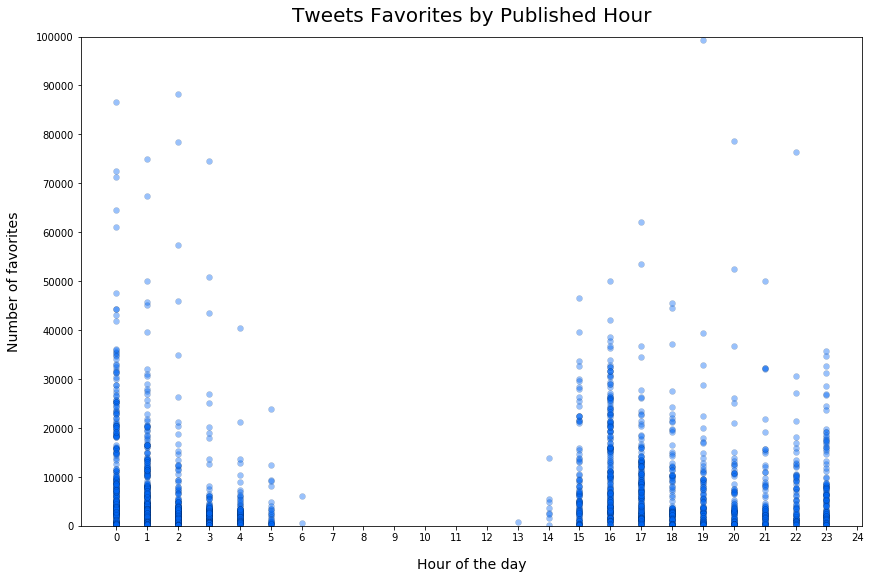

In [112]:
# Defining figure size
plt.figure(figsize=(14, 9))

# Creating scatter plot
plt.scatter(favorites_time['hour'], favorites_time['favorite_count'], alpha = 0.4, 
            edgecolor='black', linewidth=0.2,  color=['#0066F5'])

# Setting title and axis labels
plt.title('Tweets Favorites by Published Hour', size=20, pad=15)
plt.xlabel('Hour of the day', size=14, labelpad=15)
plt.ylabel('Number of favorites', size=14, labelpad=15)

# Defining the interest limit for the number of favorites, since there's plenty outliers
plt.ylim(0, 100000)

# Setting axis tick
plt.xticks(range(0, 25));
plt.yticks(range(0, 100001, 10000));

#Saving figure
plt.savefig('visualizations/favorites_hour_corr.png');

It can be observed that the page does not post in the morning and that there is a negative tendency after midnight.  
There are variations between 3 PM and 11 PM but not enough to conclude correlations.

### Do any dog stage receive more favorites than the others? <a name="fav-stage-corr"></a>

In [113]:
# Creating df with dog stage and tweets favorites info
favorites_stage = combined_clean_df[['tweet_id', 'dog_stage', 'favorite_count']].copy()

favorites_stage.head()

,tweet_id,dog_stage,favorite_count
0,892420643555336193,not informed,36250
1,892177421306343426,not informed,31263
2,891815181378084864,not informed,23543
3,891689557279858688,not informed,39547
4,891327558926688256,not informed,37766


In [114]:
# Dropping every tweet where the dog stage was not informed
favorites_stage.drop(favorites_stage.query('dog_stage == "not informed"').index, inplace=True)
# Checking favorites_stage shape
favorites_stage.shape

(303, 3)

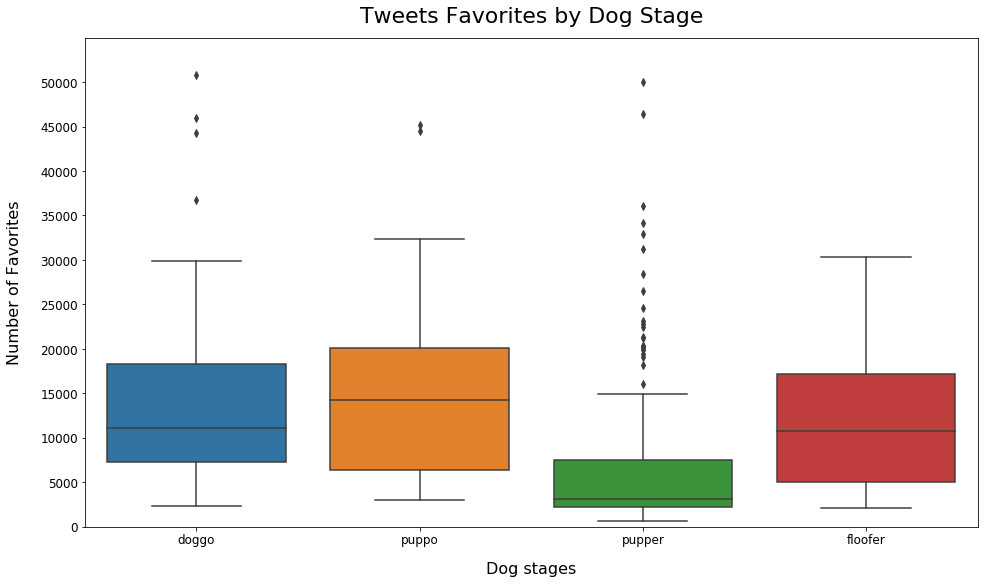

In [115]:
# Creating figure and setting its size
fig, ax = plt.subplots(figsize=(16, 9))

# Displaying box plot
sns.boxplot(x="dog_stage", y="favorite_count", data=favorites_stage);

# Defining the interest limit for the number of favorites, since there's plenty outliers
plt.ylim(0, 55000);

# Setting title and axis labels
plt.title('Tweets Favorites by Dog Stage', size=22, pad=15)
plt.xlabel('Dog stages', size=16, labelpad=15)
plt.ylabel('Number of Favorites', size=16, labelpad=18);

# Setting y axis ticks
plt.yticks(range(0, 50001, 5000))

# Defining tick label size
ax.tick_params(labelsize=12)

#Saving figure
plt.savefig('visualizations/favs_stage.png');

It looks that puppers lost this one, given that their number of favorites metrics (median, first quartile, third quartile, etc.) are far below the others stages.  
Doggos, puppos and flooflers are actually pretty close in this analysis, although  puppos are leading owing to their median being considerably higher.

### Which dog breeds receive the most favorites? <a name="top10"></a>

In [116]:
# Creating df with breed prediction and confidence, as well as tweet favorite count
favorites_breed = combined_clean_df[['tweet_id', 'dog_breed', 'breed_confidence', 'favorite_count']].copy()

favorites_breed.head()

,tweet_id,dog_breed,breed_confidence,favorite_count
0,892420643555336193,unable to recognize,0.000000,36250
1,892177421306343426,chihuahua,0.323581,31263
2,891815181378084864,chihuahua,0.716012,23543
3,891689557279858688,labrador_retriever,0.168086,39547
4,891327558926688256,basset,0.555712,37766


In [117]:
# Dropping tweets with breed_confidence less than 25%
favorites_breed.drop(favorites_breed.query('breed_confidence <= 0.25').index, inplace=True)

favorites_breed.head()

,tweet_id,dog_breed,breed_confidence,favorite_count
1,892177421306343426,chihuahua,0.323581,31263
2,891815181378084864,chihuahua,0.716012,23543
4,891327558926688256,basset,0.555712,37766
5,891087950875897856,chesapeake_bay_retriever,0.425595,19022
6,890971913173991426,appenzeller,0.341703,11076


In [118]:
# Check breed occurrences
dog_breed_occurrences = favorites_breed.dog_breed.value_counts()
# Select the names of the breeds that occurred 10 times or more
breeds_more_10_occurrences_names = dog_breed_occurrences[dog_breed_occurrences >= 10].index
# Select all tweets with breeds that occureed 10 times or more
breeds_more_10_occurrences_df = favorites_breed[favorites_breed.dog_breed.isin(breeds_more_10_occurrences_names)]

breeds_more_10_occurrences_df.head()

,tweet_id,dog_breed,breed_confidence,favorite_count
1,892177421306343426,chihuahua,0.323581,31263
2,891815181378084864,chihuahua,0.716012,23543
4,891327558926688256,basset,0.555712,37766
5,891087950875897856,chesapeake_bay_retriever,0.425595,19022
7,890729181411237888,pomeranian,0.566142,61093


In [119]:
# Select median number of favorites by each breed predicted (using median instead of mean to avoid huge outliers)
favorites_median_by_breed = breeds_more_10_occurrences_df.groupby('dog_breed').favorite_count.median()
# Select top 10 breeds with biggest median number of favorites
top_10_breeds_favorites = favorites_median_by_breed.sort_values(ascending=False)[:10].sort_values()

top_10_breeds_favorites

dog_breed
great_pyrenees      6340.5
german_shepherd     6577.0
malamute            6705.0
samoyed             6785.0
eskimo_dog          7198.0
basset              7271.0
golden_retriever    7877.0
french_bulldog      8109.0
cocker_spaniel      9412.0
cardigan            9781.0
Name: favorite_count, dtype: float64

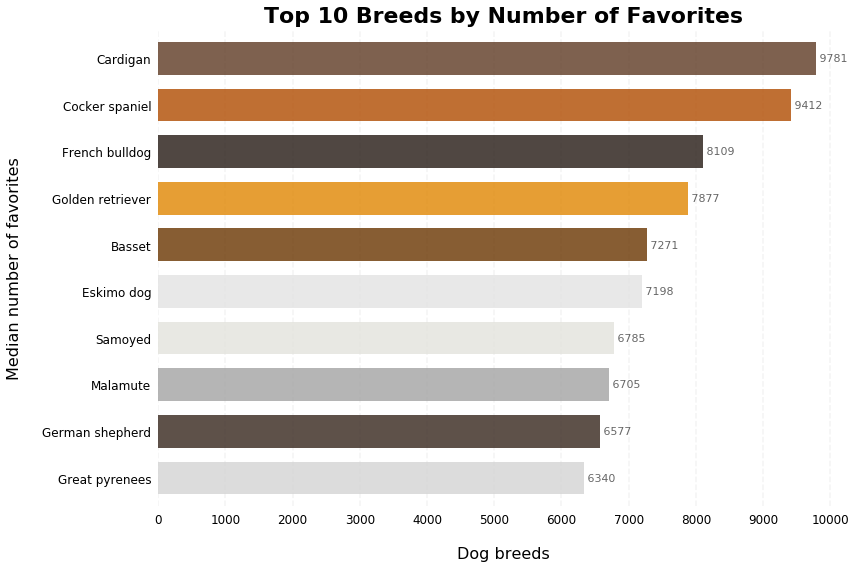

In [120]:
# Displaying bar plot with top 10 breeds
ax = top_10_breeds_favorites.plot(kind='barh', figsize=(12, 8), alpha=0.8, 
                                             zorder=2, width=0.7, legend=False, color=['#D4D4D4', '#36251C', 
                                                                                       '#A3A3A3', '#E3E3DC', 
                                                                                       '#E3E3E3', '#693400', 
                                                                                       '#E08601', '#241913', 
                                                                                       '#B04B00', '#5E3923'],)

# Set title and axis labels
ax.set_title('Top 10 Breeds by Number of Favorites', size=22, weight='bold', pad=8)
ax.set_xlabel('Dog breeds', labelpad=20, size=16)
ax.set_ylabel('Median number of favorites', labelpad=20, size=16)

# Set yticklabels
ax.set_yticklabels([breed_name.replace('_', ' ').capitalize() for breed_name in top_10_breeds_favorites.index.values])

# Set xticks
ax.set_xticks(np.arange(0, 10001, 1000));

# Turn spines invisible
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Defining not to draw the ticks
ax.tick_params(axis="both", which="both", bottom=False, left=False, labelsize=12)

# Creating vertical dashed lines 
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.7, color='#eeeeee', zorder=0)

# Displaying the median number of favorites of each dog breed after the bar
for i, value in enumerate(top_10_breeds_favorites.values):
    ax.text(value, i, f' {int(value)}', size=11, ha='left', va='center', color='#666666')
    
# Setting tight layout because the y axis label was being cutted off in the png file
plt.tight_layout() 

#Saving figure
plt.savefig('visualizations/top_10_breeds.png');

### Are non-standard ratings going better than standard ones? <a name="non-standard"></a>

In [121]:
# Selecting all unstandard ratings
non_standard_ratings = combined_clean_df.query('rating_denominator != 10 or rating_numerator >= 20')[['tweet_id', 
                                                                                                      'rating_numerator', 
                                                                                                      'rating_denominator']]

non_standard_ratings

,tweet_id,rating_numerator,rating_denominator
320,820690176645140481,84,70
382,810984652412424192,24,7
499,786709082849828864,75,10
549,778027034220126208,27,10
658,758467244762497024,165,150
722,749981277374128128,1776,10
794,740373189193256964,9,11
842,731156023742988288,204,170
884,722974582966214656,4,20
918,716439118184652801,50,50


In [122]:
# Creating df with non-stantard ratings and their number of favorites
non_standard_ratings_favorites = pd.merge(non_standard_ratings, 
                                          combined_clean_df[['tweet_id', 'favorite_count']], 
                                          left_on='tweet_id', 
                                          right_on='tweet_id', 
                                          how='inner')
non_standard_ratings_favorites

,tweet_id,rating_numerator,rating_denominator,favorite_count
0,820690176645140481,84,70,12386
1,810984652412424192,24,7,5448
2,786709082849828864,75,10,18618
3,778027034220126208,27,10,6652
4,758467244762497024,165,150,4824
5,749981277374128128,1776,10,5141
6,740373189193256964,9,11,34969
7,731156023742988288,204,170,3828
8,722974582966214656,4,20,4075
9,716439118184652801,50,50,2364


In [123]:
# Checking non-standard ratings descriptive statistics
non_standard_ratings_favorites.favorite_count.describe()

count       22.000000
mean      8365.909091
std      10541.512212
min        138.000000
25%       2685.000000
50%       3820.500000
75%       6351.000000
max      36760.000000
Name: favorite_count, dtype: float64

It is not possible to identify any significant benefit from using non-standard ratings. The observed variations must exist due to different publish times and the dog characteristics in the photo.

## References <a name="references"></a>

- [Creating horizontal bar charts using pandas](https://mode.com/example-gallery/python_horizontal_bar/)
- [Feature engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- [Interquartile Range (IQR): What it is and How to Find it](https://www.statisticshowto.com/probability-and-statistics/interquartile-range/)
- [Measures of Central Tendency: Mean, Median, and Mode](https://statisticsbyjim.com/basics/measures-central-tendency-mean-median-mode/)
- [Merge and Join DataFrames with Pandas in Python](https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/)
- [When Should I Use Logarithmic Scales in My Charts and Graphs?](https://www.forbes.com/sites/naomirobbins/2012/01/19/when-should-i-use-logarithmic-scales-in-my-charts-and-graphs/#181c484b5e67)